# Import Data Sets

In [1]:
import pandas as pd

In [2]:
train_data_path = r"C:\Users\hasan\OneDrive\Masaüstü\Data_Science\Data_Science_Projects\Customer_Churn_Dataset\data\customer_churn_dataset-training-master.csv"
train_data = pd.read_csv(train_data_path)

In [3]:
test_data_path = r"C:\Users\hasan\OneDrive\Masaüstü\Data_Science\Data_Science_Projects\Customer_Churn_Dataset\data\customer_churn_dataset-testing-master.csv"
test_data = pd.read_csv(test_data_path)

# Data Cleaning/Analysis

## Training Data Cleaning/Analysis

In [4]:
train_data.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [5]:
# getting preliminary informations from the training dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [6]:
# there is a NaN values in the training dataset
pd.DataFrame(train_data.isna().value_counts())

0
CustomerID Age   Gender Tenure Usage Frequency Support Calls Payment Delay Subscription Type Contract Length Total Spend Last Interaction Churn        
False      False False  False  False           False         False         False             False           False       False            False  440832
True       True  True   True   True            True          True          True              True            True        True             True        1

In [7]:
# At which row is this NaN value place?
train_data[train_data.loc[:,'CustomerID'].isna() == True]

CustomerID  Age Gender  Tenure  Usage Frequency  Support Calls  \
199295         NaN  NaN    NaN     NaN              NaN            NaN   

        Payment Delay Subscription Type Contract Length  Total Spend  \
199295            NaN               NaN             NaN          NaN   

        Last Interaction  Churn  
199295               NaN    NaN

In [8]:
# delete the NaN value in the 199295th row of the dataset
train_data = train_data.drop(index=199295, axis=1)

### CustomerID Column Analysis

There is no duplicate value in the CustomerID column.

In [9]:
# unique value rows and value rows are the same
print(train_data['CustomerID'].unique().shape)
print(train_data['CustomerID'].shape)

(440832,)
(440832,)


### Gender Column Analysis

In [10]:
# What values are there in the Gender column?
train_data.loc[:,'Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Subscription Type Column Analysis

In [11]:
# What values are there in the Subscription Type column?
train_data.loc[:,'Subscription Type'].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

### Contract Length Column Analysis

In [12]:
# What values are there in the Contract Length column?
train_data.loc[:,'Contract Length'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

### Casting Float Data Type Columns Into Int Data Type

In [13]:
# Casting Float Data Type Columns Into Int Data Type
for i in train_data.columns:
    if train_data[i].dtypes != 'O':
        train_data[i] = train_data[i].astype('int')

In [14]:
train_data.head()

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           2   30  Female      39               14              5   
1           3   65  Female      49                1             10   
2           4   55  Female      14                4              6   
3           5   58    Male      38               21              7   
4           6   23    Male      32               20              5   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             18          Standard          Annual          932   
1              8             Basic         Monthly          557   
2             18             Basic       Quarterly          185   
3              7          Standard         Monthly          396   
4              8             Basic         Monthly          617   

   Last Interaction  Churn  
0                17      1  
1                 6      1  
2                 3      1  
3                29      1  
4                20      1

<Br>

## Test Data Cleaning/Analysis

In [15]:
test_data.head()

CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0

In [16]:
# there is no NaN value in the test dataseet 
test_data.isna().value_counts()

CustomerID  Age    Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  Subscription Type  Contract Length  Total Spend  Last Interaction  Churn
False       False  False   False   False            False          False          False              False            False        False             False    64374
dtype: int64

In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


### Gender Column Analysis

In [18]:
# What values are there in the Gender column?
test_data.loc[:,'Gender'].unique()

array(['Female', 'Male'], dtype=object)

### Subscription Type Column Analysis

In [19]:
# What values are there in the Subscription Type column?
test_data.loc[:,'Subscription Type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

### Contract Length Column Analysis

In [20]:
# What values are there in the Contract Length column?
test_data.loc[:,'Contract Length'].unique()

array(['Monthly', 'Annual', 'Quarterly'], dtype=object)

<Br>

# Explanatory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

<Br>

## Churn Ratio Over The Data Set

In [22]:
# 56.7% of the customers in the train set has churned
# !!! BLUE area is for the churned customers
train_churn = train_data['Churn'].value_counts().reset_index()
fig = go.Figure(data=[go.Pie(labels=train_churn['index'], values=train_churn['Churn'], pull=[ 0.025, 0], hole=.2)])
fig.update_layout(title_text='Churned Customer Distribution Over The Train Dataset')
fig.show()

In [23]:
# 47.4% of the customers in the test set has churned
# !!! RED area is for the churned customers
test_churn = test_data['Churn'].value_counts().reset_index()
fig = go.Figure(data=[go.Pie(labels=test_churn['index'], values=test_churn['Churn'], pull=[0, 0.025], hole=0.2)])
fig.update_layout(title_text='Churned Customer Distribution Over The Test Dataset')
fig.show()

## Age Distribution Of The Customers

There is a distinguishable age gap in the train dataset for the churned customers. However, there is no age gap in the test dataset for the churned-unchurned dataset.
Therefore, age might not be appropriate data for the prediction models.

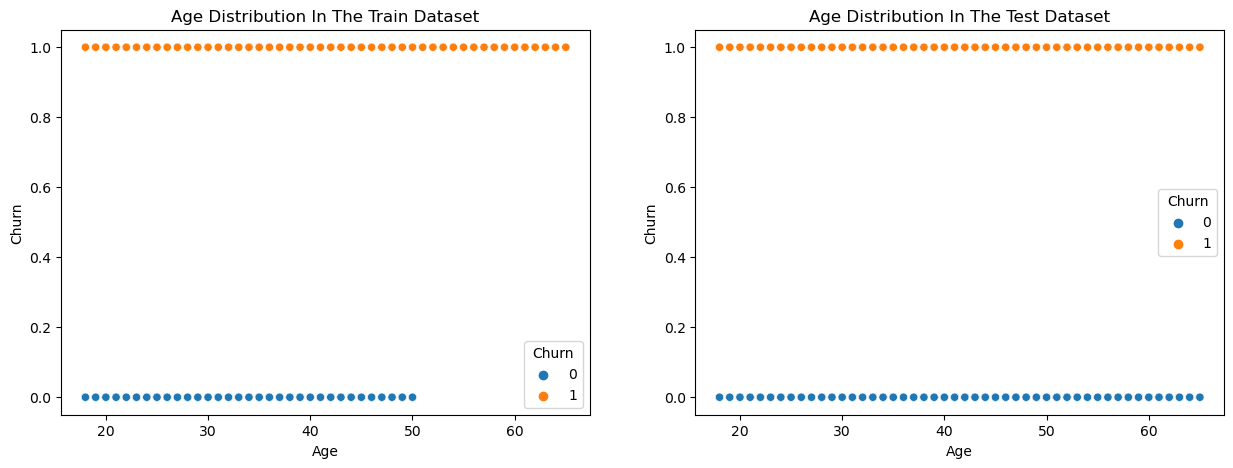

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Age', y='Churn', hue='Churn')
plt.title('Age Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Age', y='Churn', hue='Churn')
plt.title('Age Distribution In The Test Dataset')

plt.show()

---

Also, **as it can be seen from the below graphs**, there is no certain age distribution for the churned and unchurned customers in both train and test datasets. Which means, age has no considerable effect for churning of the customers.

In [25]:
churned_data_train = train_data[train_data.loc[:,'Churn']==1]
unchurned_data_train = train_data[train_data.loc[:,'Churn']==0]

churned_data_test = test_data[test_data.loc[:,'Churn']==1]
unchurned_data_test = test_data[test_data.loc[:,'Churn']==0]

Text(0.5, 1.0, 'Test Dataset/ Age Freq. of UN-Churned Cust.')

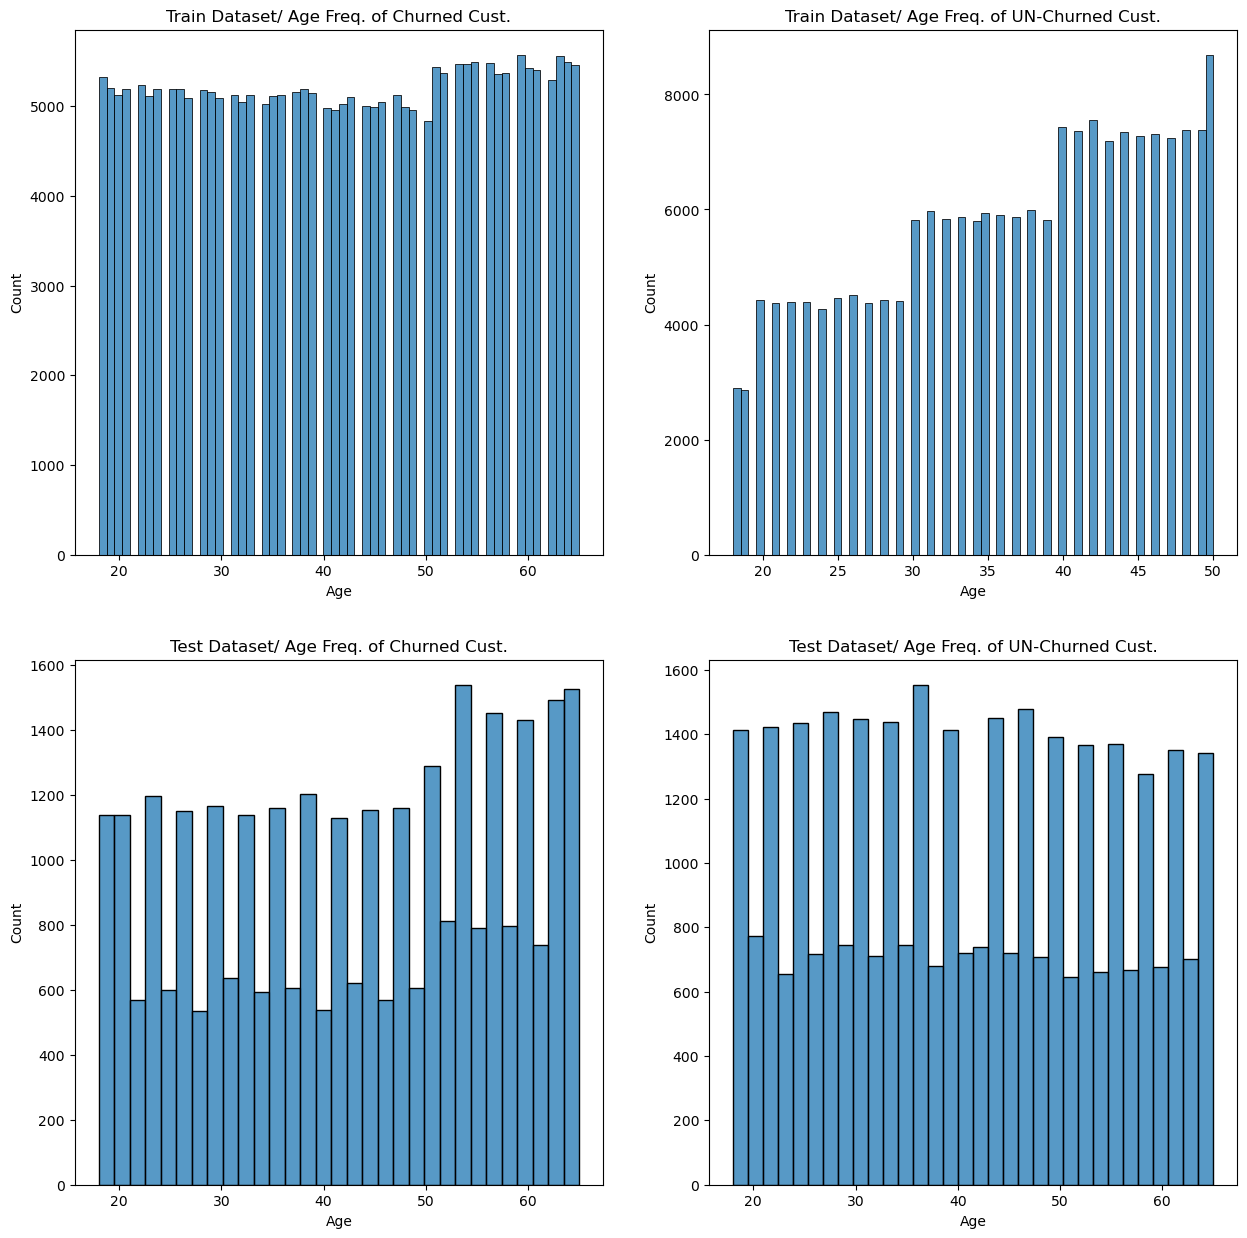

In [26]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(churned_data_train, x='Age')
plt.title('Train Dataset/ Age Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(unchurned_data_train, x='Age')
plt.title('Train Dataset/ Age Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(churned_data_test, x='Age')
plt.title('Test Dataset/ Age Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(unchurned_data_test, x='Age')
plt.title('Test Dataset/ Age Freq. of UN-Churned Cust.')

<Br>

## Gender Distribution Of The Customers

Both genders has different behaviours for the train and test datasets. Therefore, it can be said that gender might not be the one of appropriate criteria for the predictive models.

Text(0.5, 1.0, 'Churning Distribution In The Test Dataset For Both Genders')

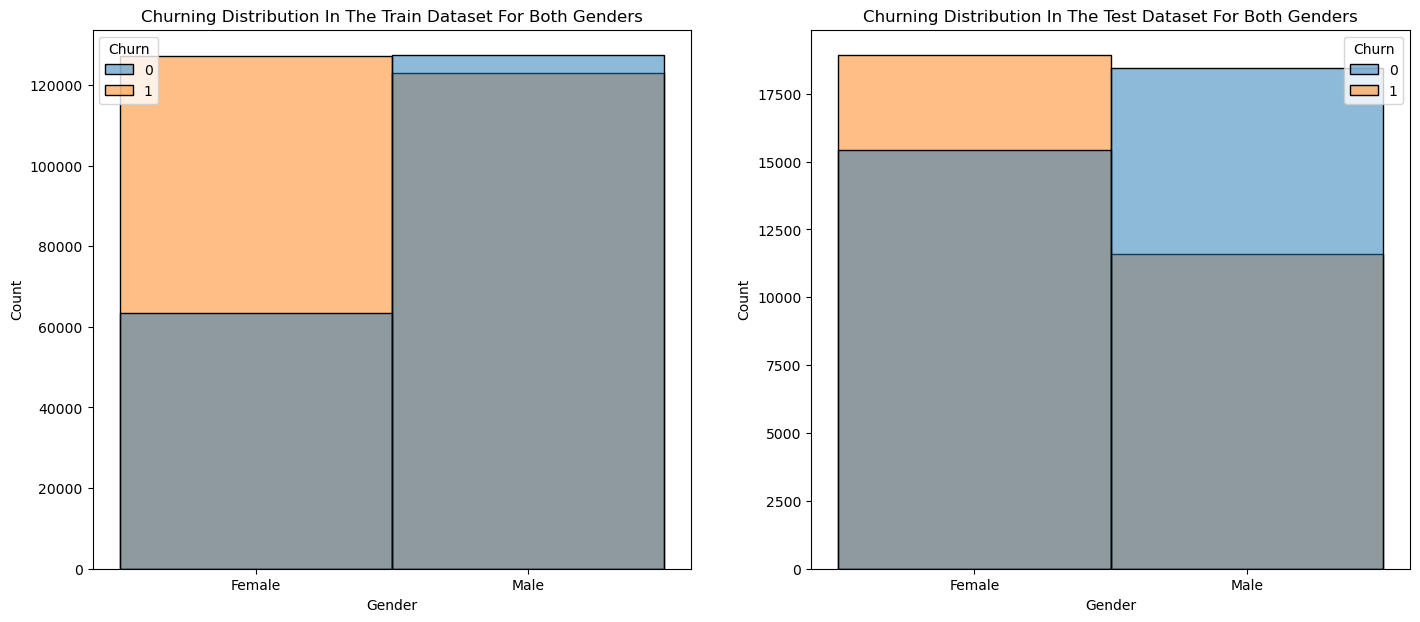

In [27]:
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
sns.histplot(train_data, x='Gender', hue='Churn')
plt.title('Churning Distribution In The Train Dataset For Both Genders')

plt.subplot(1,2,2)
sns.histplot(test_data, x='Gender', hue='Churn')
plt.title('Churning Distribution In The Test Dataset For Both Genders')

<Br>

## Tenure Distribution Of The Customers

There is no significant tenure interval in aspect of churning situation.

Text(0.5, 1.0, 'Tenure Distribution In The Test Dataset')

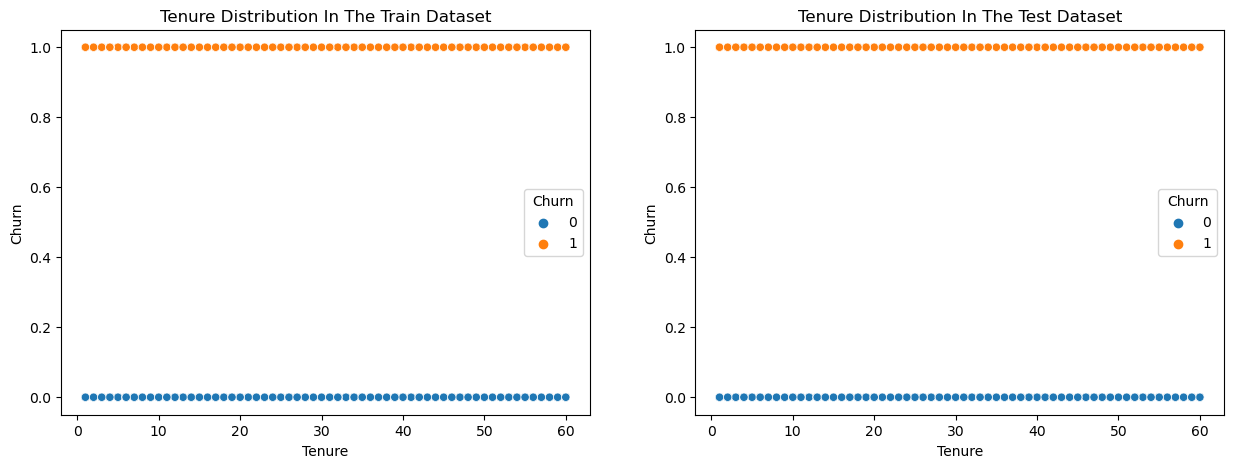

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Tenure', y='Churn', hue='Churn')
plt.title('Tenure Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Tenure', y='Churn', hue='Churn')
plt.title('Tenure Distribution In The Test Dataset')

---

There is a differentiation for the churned customers in the test data. However, amount of the churned customer in the test data 
is considerably small when it is compared with the amount of churned customer in the train data. Therefore, probably tenure of the train data will not be meaningful for the churned customer determination.
Also, there is only small portion of tenure amount in the test data that can be considered. 

Text(0.5, 1.0, 'Test Dataset/ Tenure Freq. of UN-Churned Cust.')

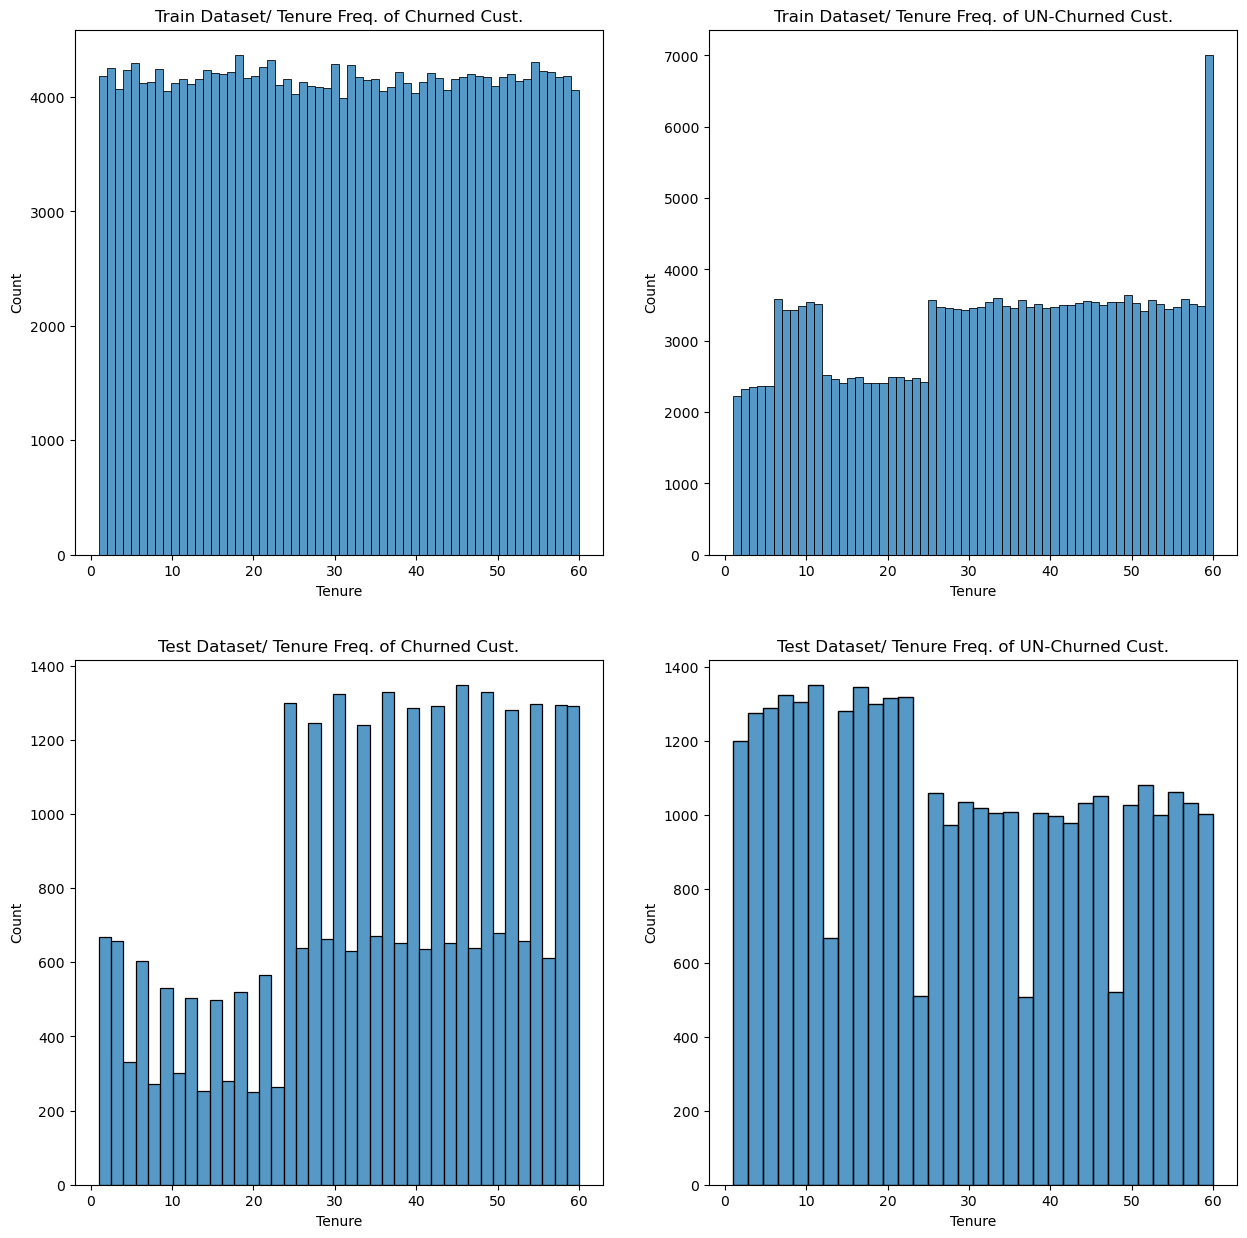

In [29]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=churned_data_train, x='Tenure')
plt.title('Train Dataset/ Tenure Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(data=unchurned_data_train, x='Tenure')
plt.title('Train Dataset/ Tenure Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(data=churned_data_test, x='Tenure')
plt.title('Test Dataset/ Tenure Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(data=unchurned_data_test, x='Tenure')
plt.title('Test Dataset/ Tenure Freq. of UN-Churned Cust.')

<Br>

## Usage Frequency Distribution Of The Customers

There is no significant usage frequency interval in aspect for the churning situation.

Text(0.5, 1.0, 'Usage Frequency Distribution In The Test Dataset')

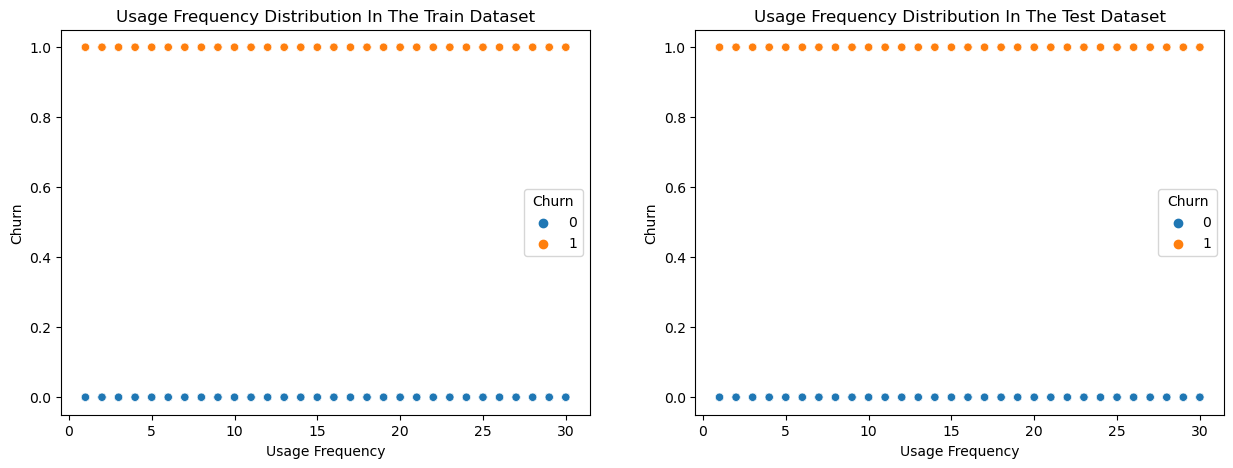

In [30]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Usage Frequency', y='Churn', hue='Churn')
plt.title('Usage Frequency Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Usage Frequency', y='Churn', hue='Churn')
plt.title('Usage Frequency Distribution In The Test Dataset')

---

There is approximately homogeneous frequency distribution for the usage frequency in churned customers and un-hurned customers. Therefore, usage frequency might not be a proper criteria for the future predictions.

Text(0.5, 1.0, 'Test Dataset/ Usage Frequency Freq. of UN-Churned Cust.')

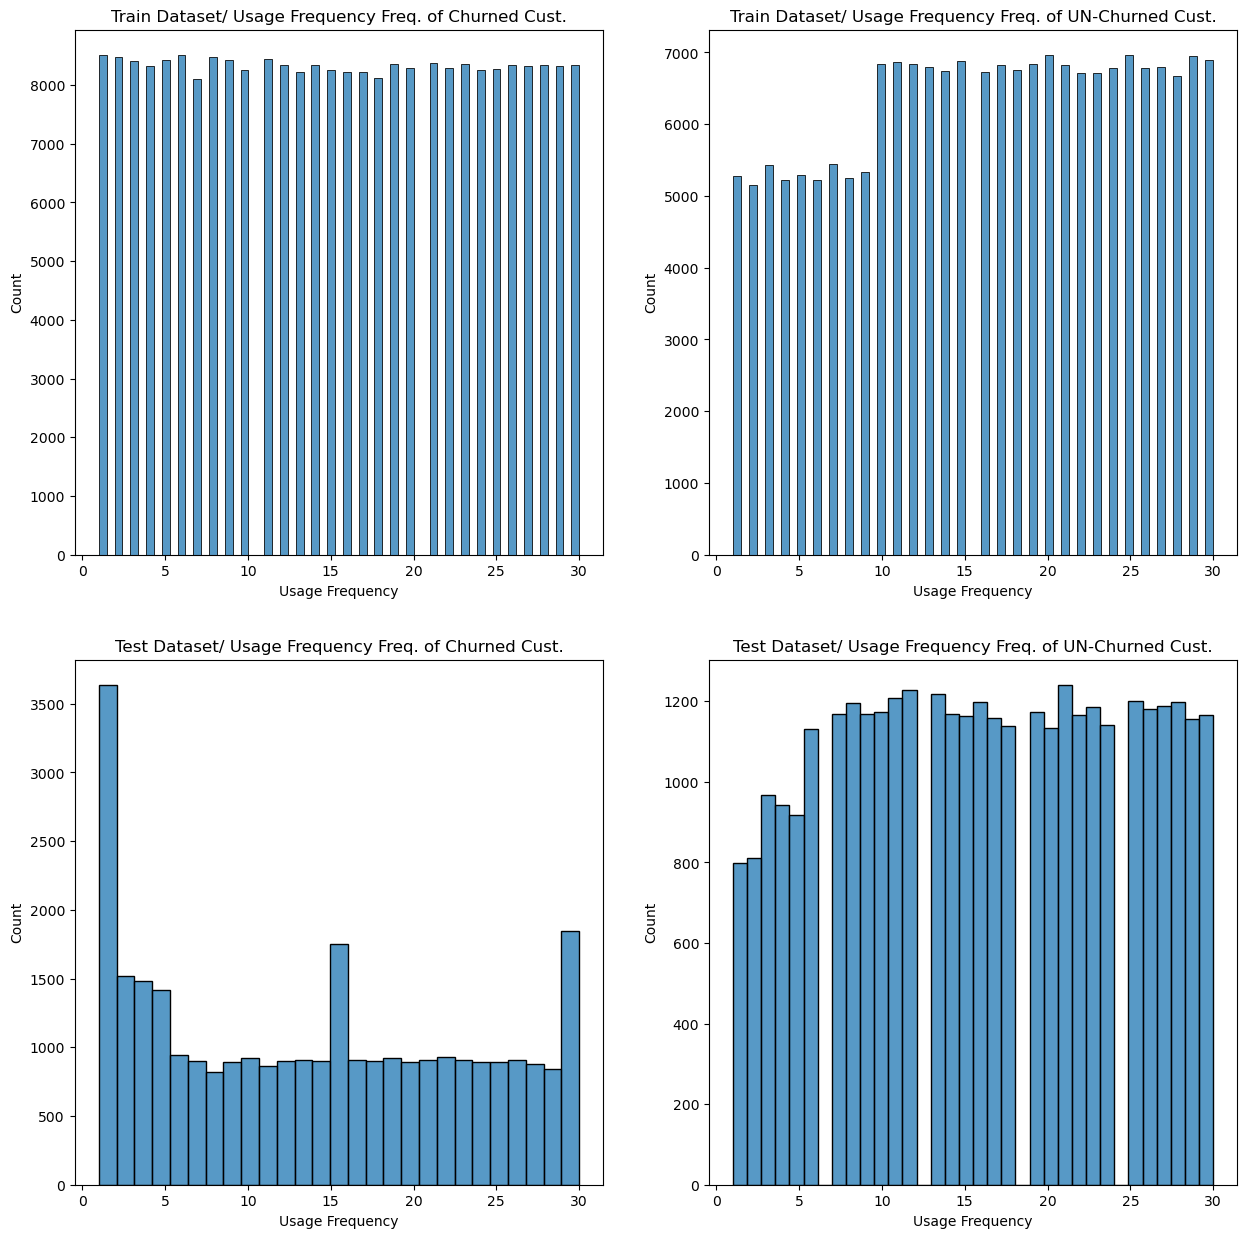

In [31]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=churned_data_train, x='Usage Frequency')
plt.title('Train Dataset/ Usage Frequency Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(data=unchurned_data_train, x='Usage Frequency')
plt.title('Train Dataset/ Usage Frequency Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(data=churned_data_test, x='Usage Frequency')
plt.title('Test Dataset/ Usage Frequency Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(data=unchurned_data_test, x='Usage Frequency')
plt.title('Test Dataset/ Usage Frequency Freq. of UN-Churned Cust.')

<Br>

## Support Calls Distribution Of The Customers

There is a gap in support calls for the train data although there is homogeneous distribution for the test data.

Text(0.5, 1.0, 'Support Calls Distribution In The Test Dataset')

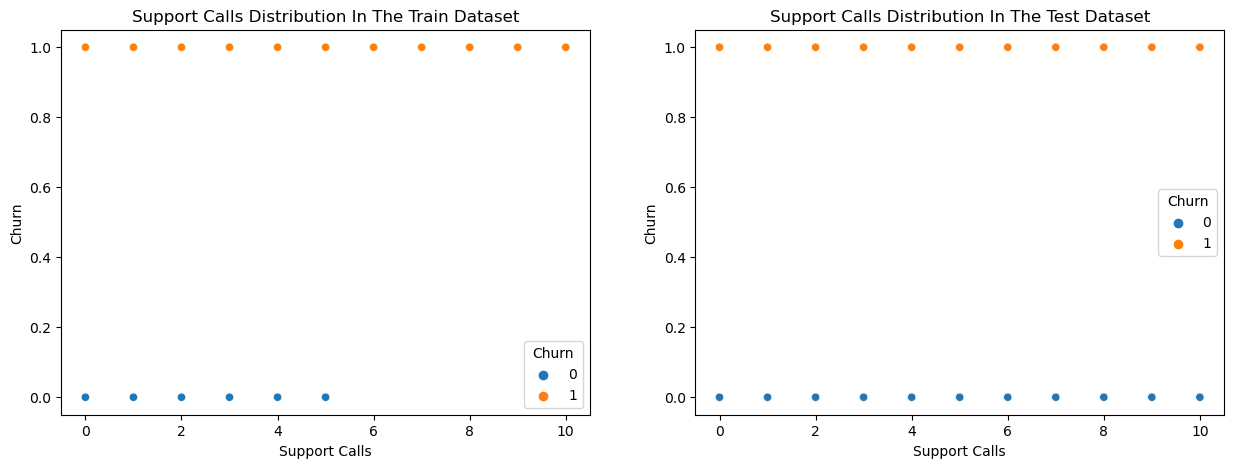

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Support Calls', y='Churn', hue='Churn')
plt.title('Support Calls Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Support Calls', y='Churn', hue='Churn')
plt.title('Support Calls Distribution In The Test Dataset')

---

There is almost homogeneous support call distribution for the churned customers. However, there is a decrease in support call number for the un-churned data. Therefore, it can be said that Support Calls can be a proper criterion for the future classification predictions.

Text(0.5, 1.0, 'Test Dataset/ Support Calls Freq. of UN-Churned Cust.')

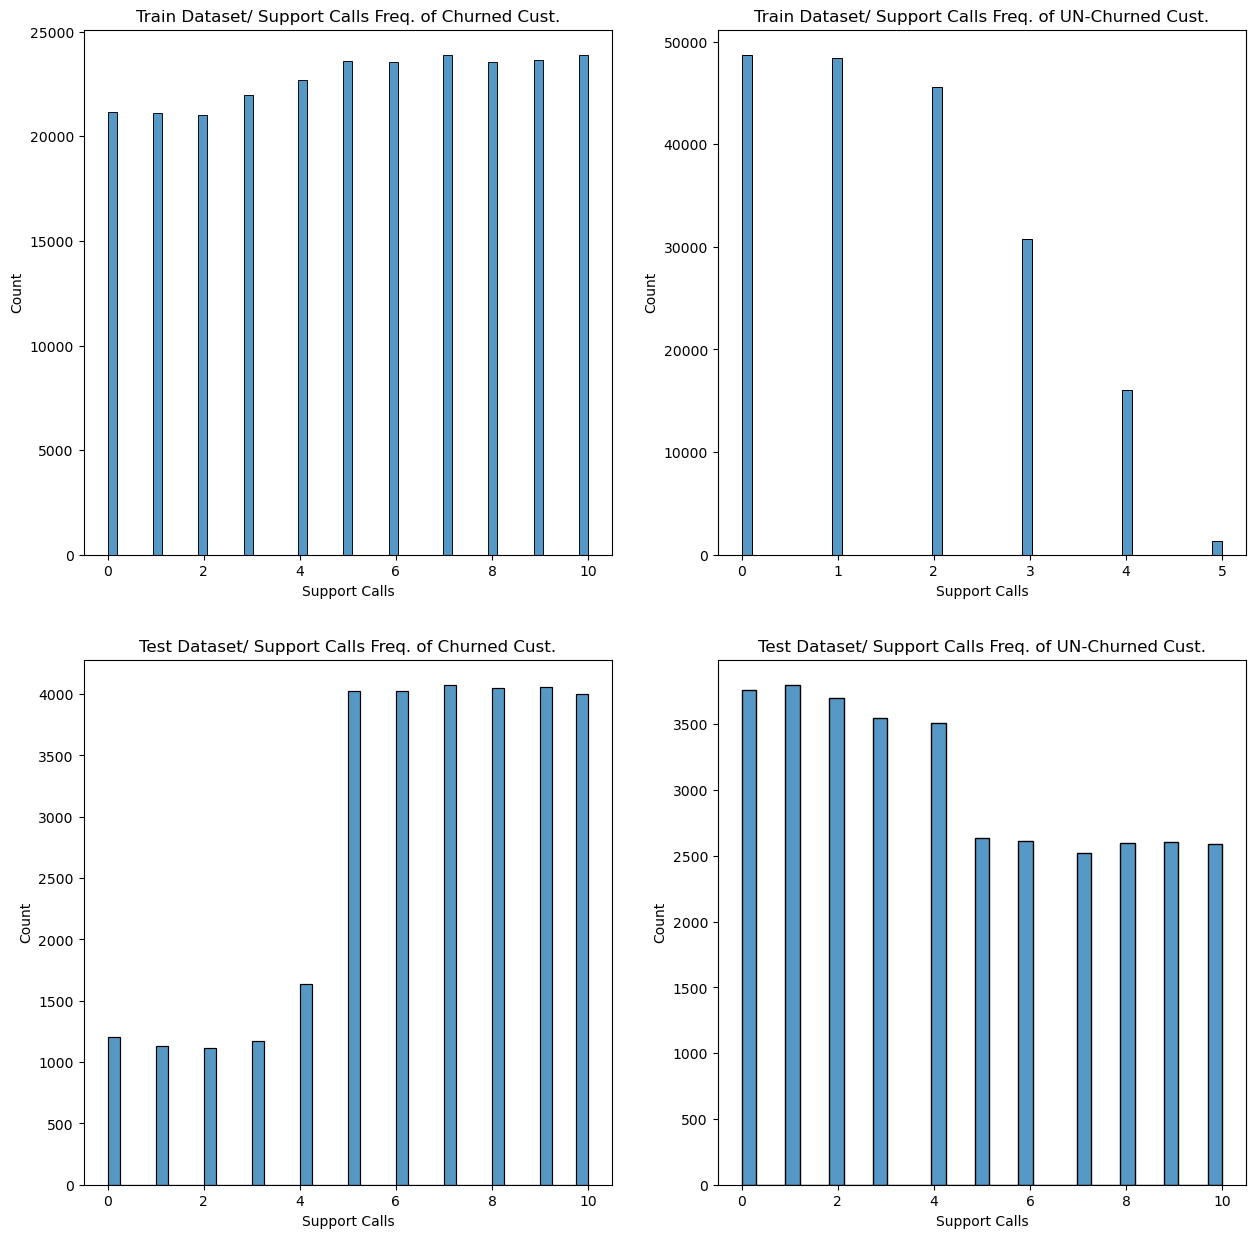

In [33]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=churned_data_train, x='Support Calls')
plt.title('Train Dataset/ Support Calls Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(data=unchurned_data_train, x='Support Calls')
plt.title('Train Dataset/ Support Calls Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(data=churned_data_test, x='Support Calls')
plt.title('Test Dataset/ Support Calls Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(data=unchurned_data_test, x='Support Calls')
plt.title('Test Dataset/ Support Calls Freq. of UN-Churned Cust.')

<Br>

## Payment Delay Distribution Of The Customers

There is a gap in Payment Delay for the train data although there is homogeneous distribution for the test data.

Text(0.5, 1.0, 'Payment Delay Distribution In The Test Dataset')

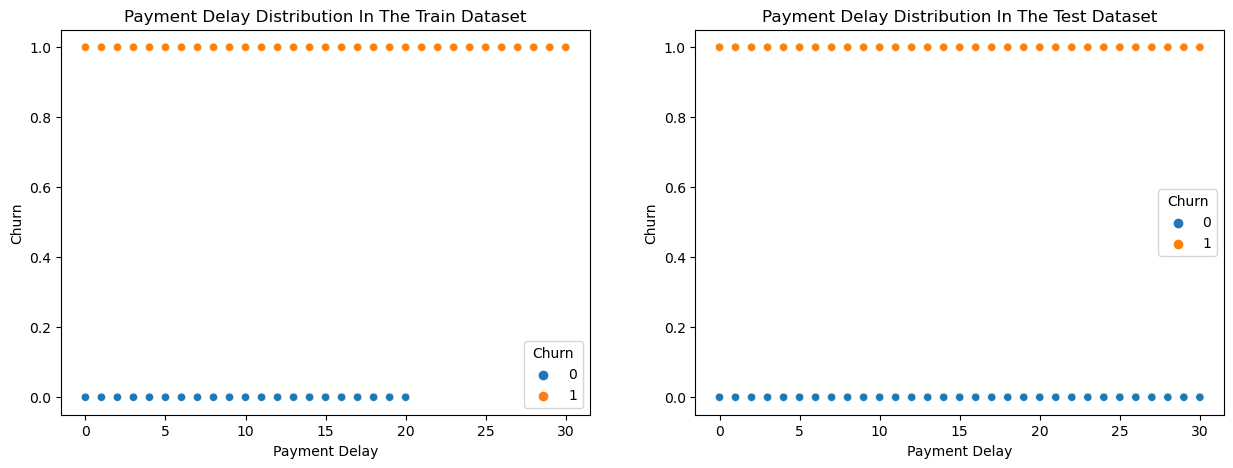

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Payment Delay', y='Churn', hue='Churn')
plt.title('Payment Delay Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Payment Delay', y='Churn', hue='Churn')
plt.title('Payment Delay Distribution In The Test Dataset')

---

There is an increasing trend after 15 payment delay for the churned customers. Also, there is a decrease in payment delay for the un-churned data. Therefore, it can be said that Payment Delay can be a proper criterion for the future classification predictions.

Text(0.5, 1.0, 'Test Dataset/ Payment Delay Freq. of UN-Churned Cust.')

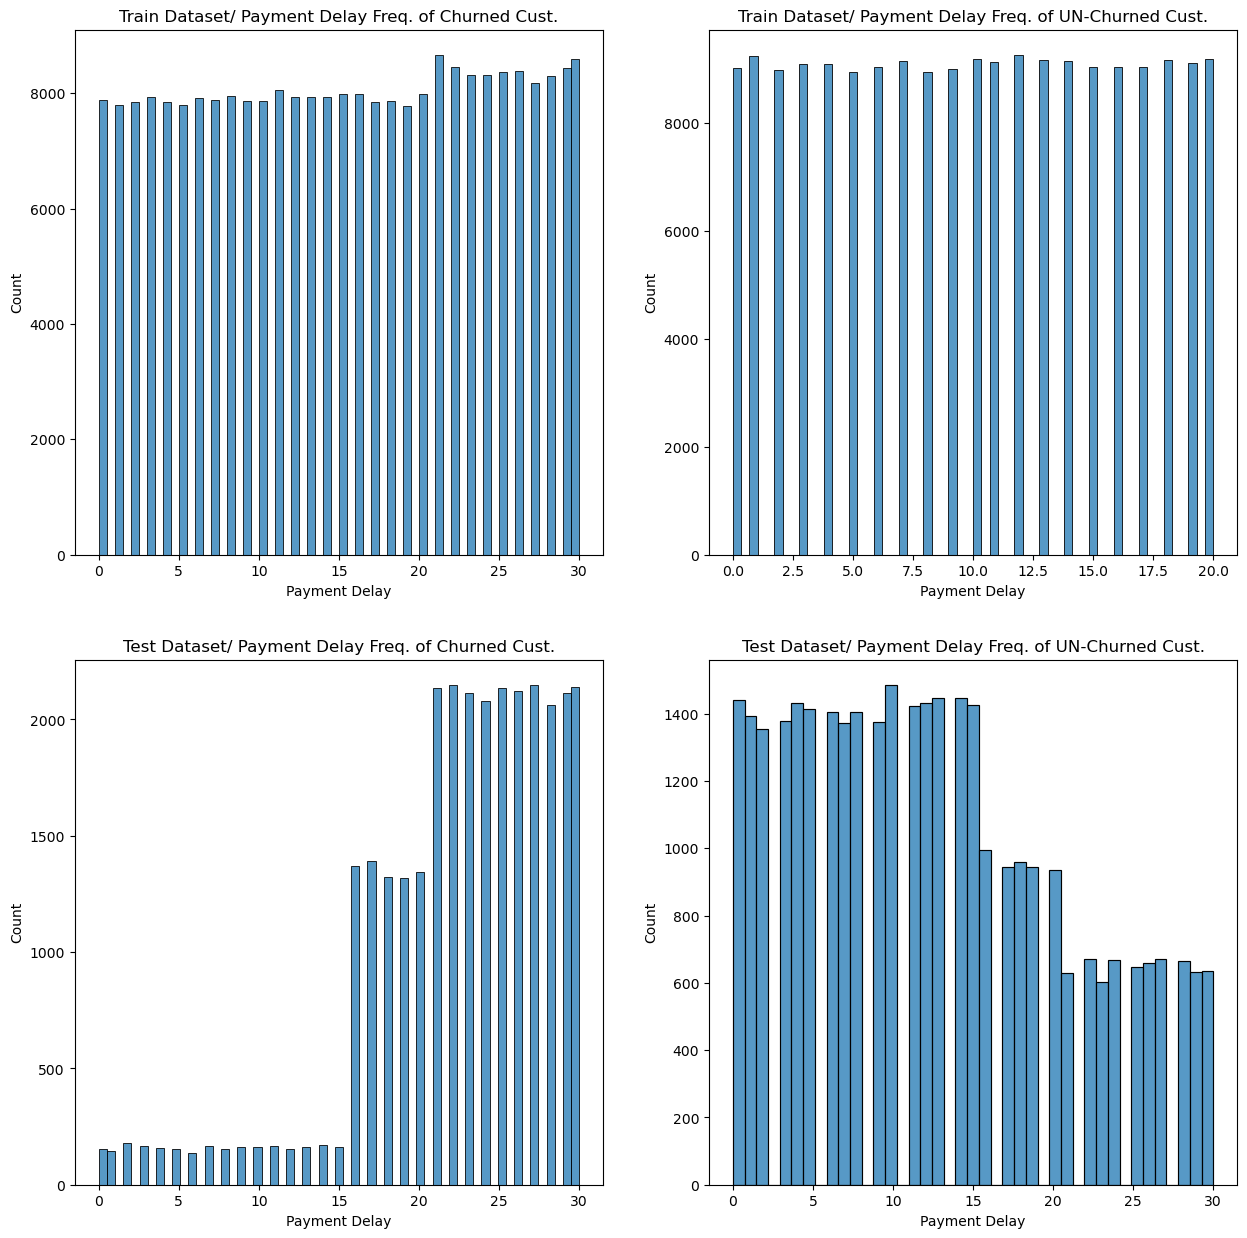

In [35]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=churned_data_train, x='Payment Delay')
plt.title('Train Dataset/ Payment Delay Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(data=unchurned_data_train, x='Payment Delay')
plt.title('Train Dataset/ Payment Delay Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(data=churned_data_test, x='Payment Delay')
plt.title('Test Dataset/ Payment Delay Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(data=unchurned_data_test, x='Payment Delay')
plt.title('Test Dataset/ Payment Delay Freq. of UN-Churned Cust.')

<Br>

## Subscription Type Distribution Of The Customers

Text(0.5, 1.0, 'Churning Distribution In The Test Dataset For Subscription Types')

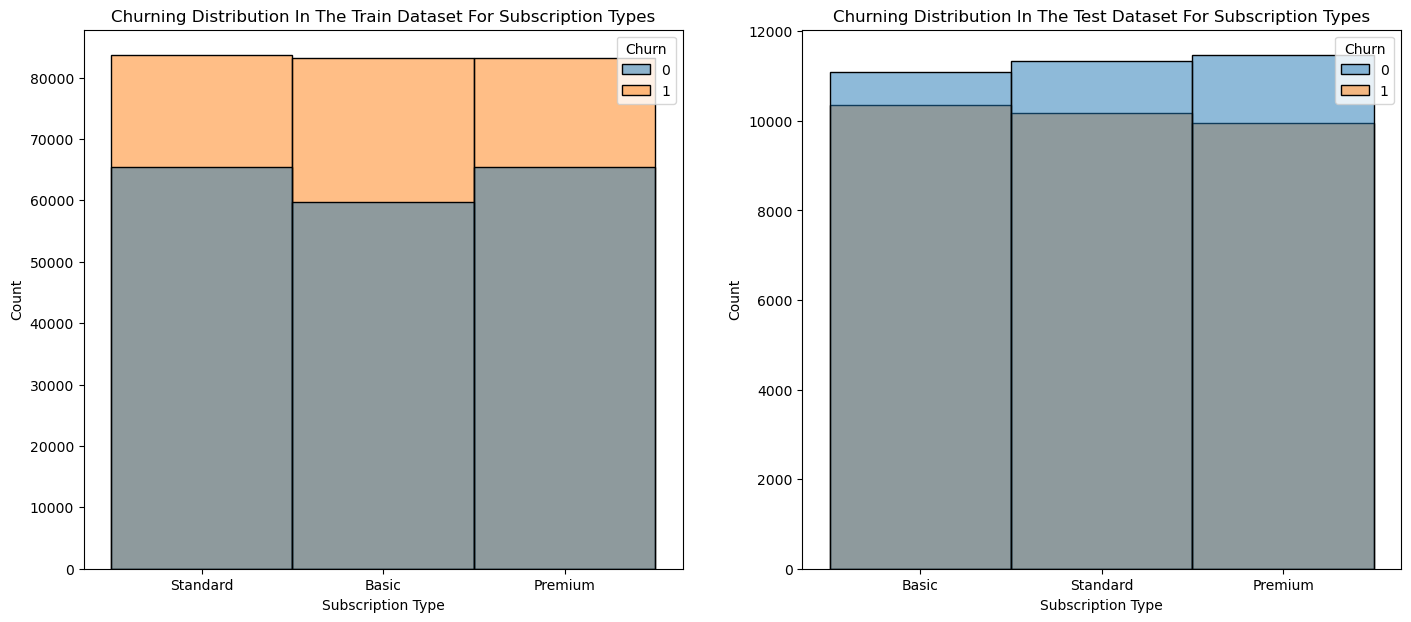

In [36]:
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
sns.histplot(train_data, x='Subscription Type', hue='Churn')
plt.title('Churning Distribution In The Train Dataset For Subscription Types')

plt.subplot(1,2,2)
sns.histplot(test_data, x='Subscription Type', hue='Churn')
plt.title('Churning Distribution In The Test Dataset For Subscription Types')

<Br>

## Contract Length Distribution Of The Customers

Text(0.5, 1.0, 'Churning Distribution In The Test Dataset For Subscription Types')

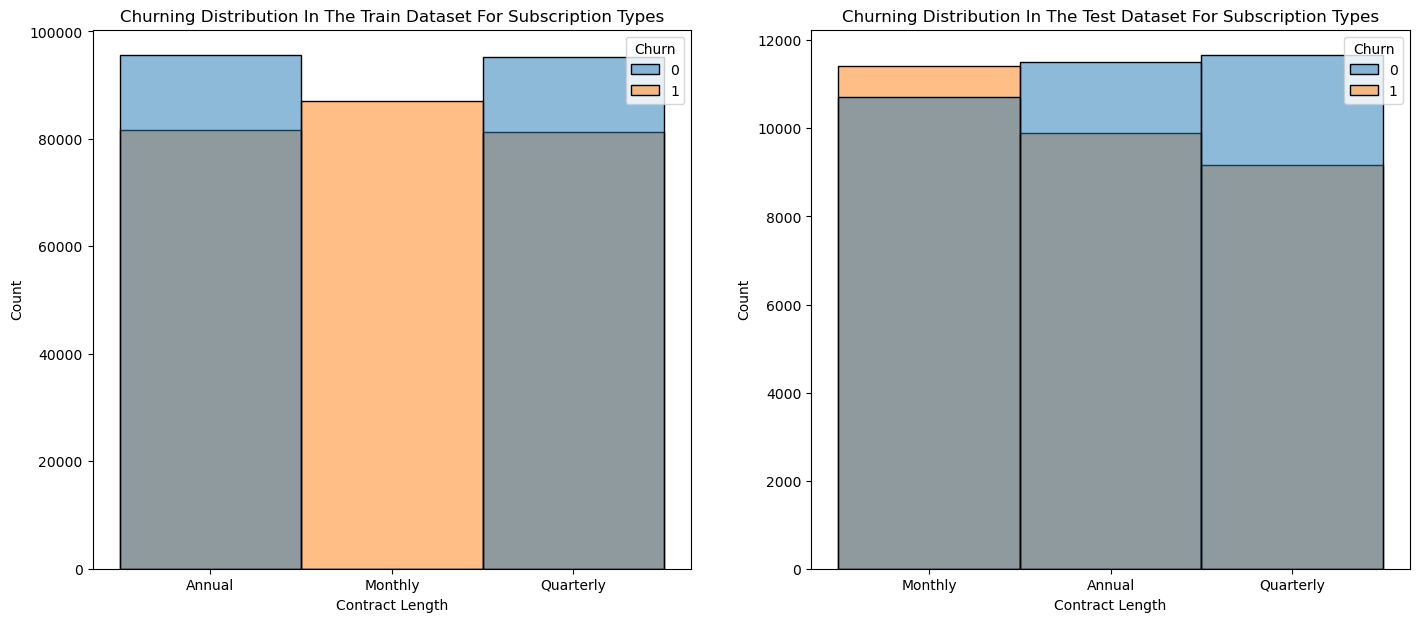

In [37]:
plt.figure(figsize=(17,7))

plt.subplot(1,2,1)
sns.histplot(train_data, x='Contract Length', hue='Churn')
plt.title('Churning Distribution In The Train Dataset For Subscription Types')

plt.subplot(1,2,2)
sns.histplot(test_data, x='Contract Length', hue='Churn')
plt.title('Churning Distribution In The Test Dataset For Subscription Types')

<Br>

## Total Spend Distribution Of The Customers

There is homogeneous distribution of the churned customers in the total spend.

Text(0.5, 1.0, 'Total Spend Distribution In The Test Dataset')

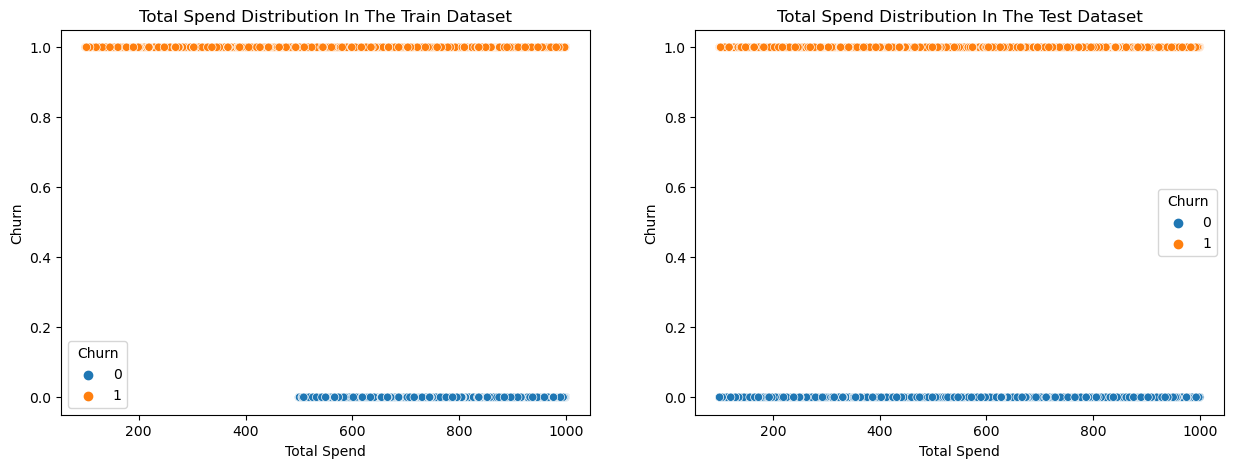

In [38]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Total Spend', y='Churn', hue='Churn')
plt.title('Total Spend Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Total Spend', y='Churn', hue='Churn')
plt.title('Total Spend Distribution In The Test Dataset')

---

Also, total spend is almost homogeneous for the churned and unchurned customers in both train and test data.

Text(0.5, 1.0, 'Test Dataset/ Total Spend Freq. of UN-Churned Cust.')

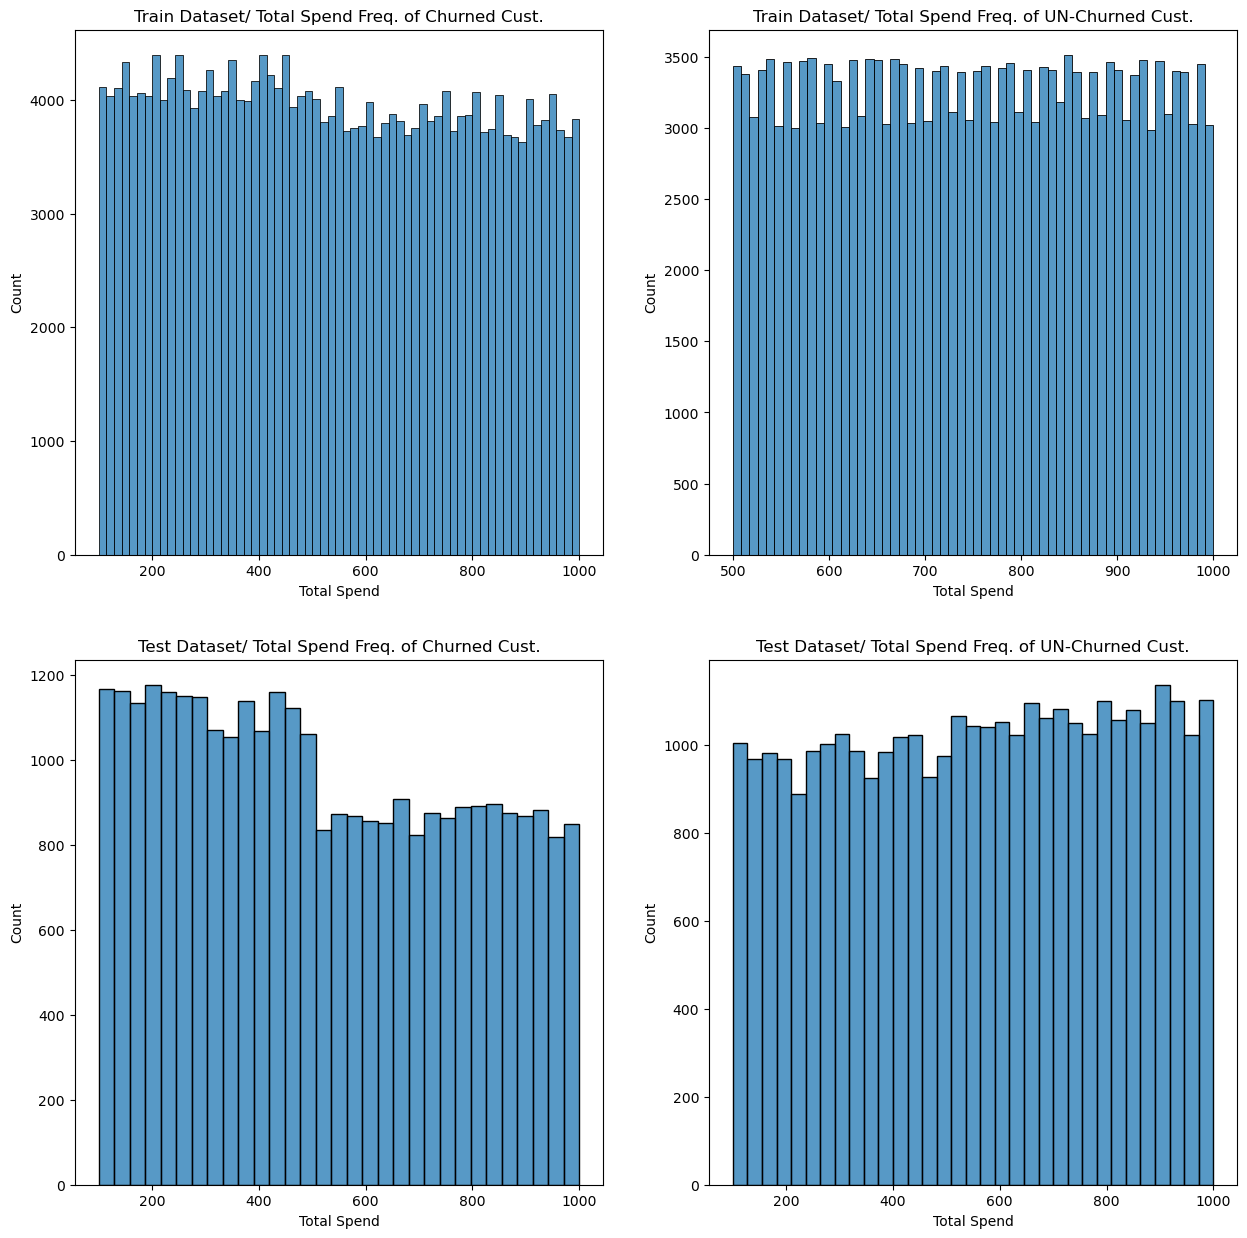

In [39]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=churned_data_train, x='Total Spend')
plt.title('Train Dataset/ Total Spend Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(data=unchurned_data_train, x='Total Spend')
plt.title('Train Dataset/ Total Spend Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(data=churned_data_test, x='Total Spend')
plt.title('Test Dataset/ Total Spend Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(data=unchurned_data_test, x='Total Spend')
plt.title('Test Dataset/ Total Spend Freq. of UN-Churned Cust.')

<Br>

## Last Interaction Distribution Of The Customers

There is homogeneous distribution of the churned and unchurned customers in the Last Interaction .

Text(0.5, 1.0, 'Last Interaction Distribution In The Test Dataset')

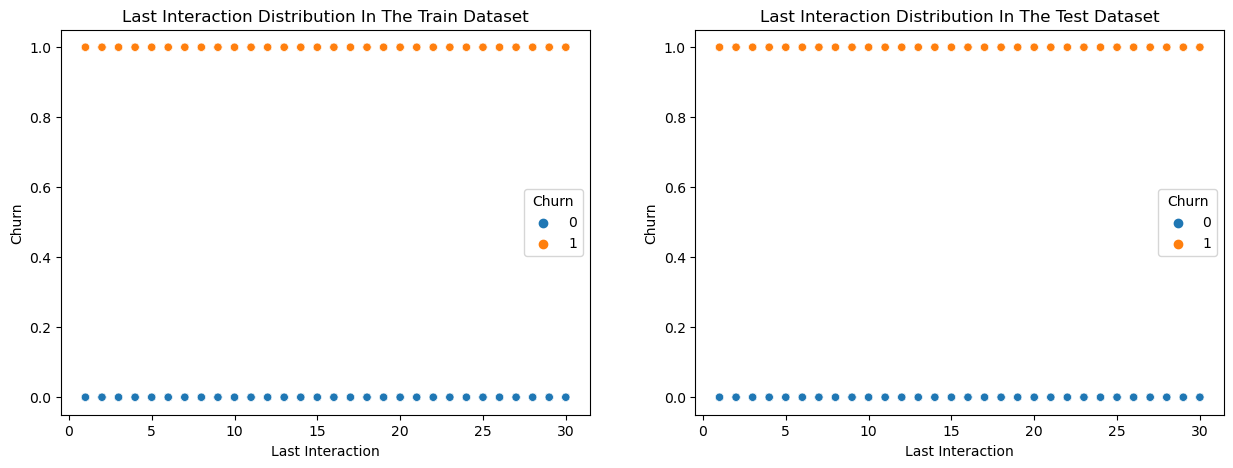

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(data=train_data, x='Last Interaction', y='Churn', hue='Churn')
plt.title('Last Interaction Distribution In The Train Dataset')

plt.subplot(1,2,2)
sns.scatterplot(data=test_data, x='Last Interaction', y='Churn', hue='Churn')
plt.title('Last Interaction Distribution In The Test Dataset')

---

Also, **Last Interaction** is almost homogeneous for the churned and unchurned customers in the train data.

Text(0.5, 1.0, 'Test Dataset/ Last Interaction Freq. of UN-Churned Cust.')

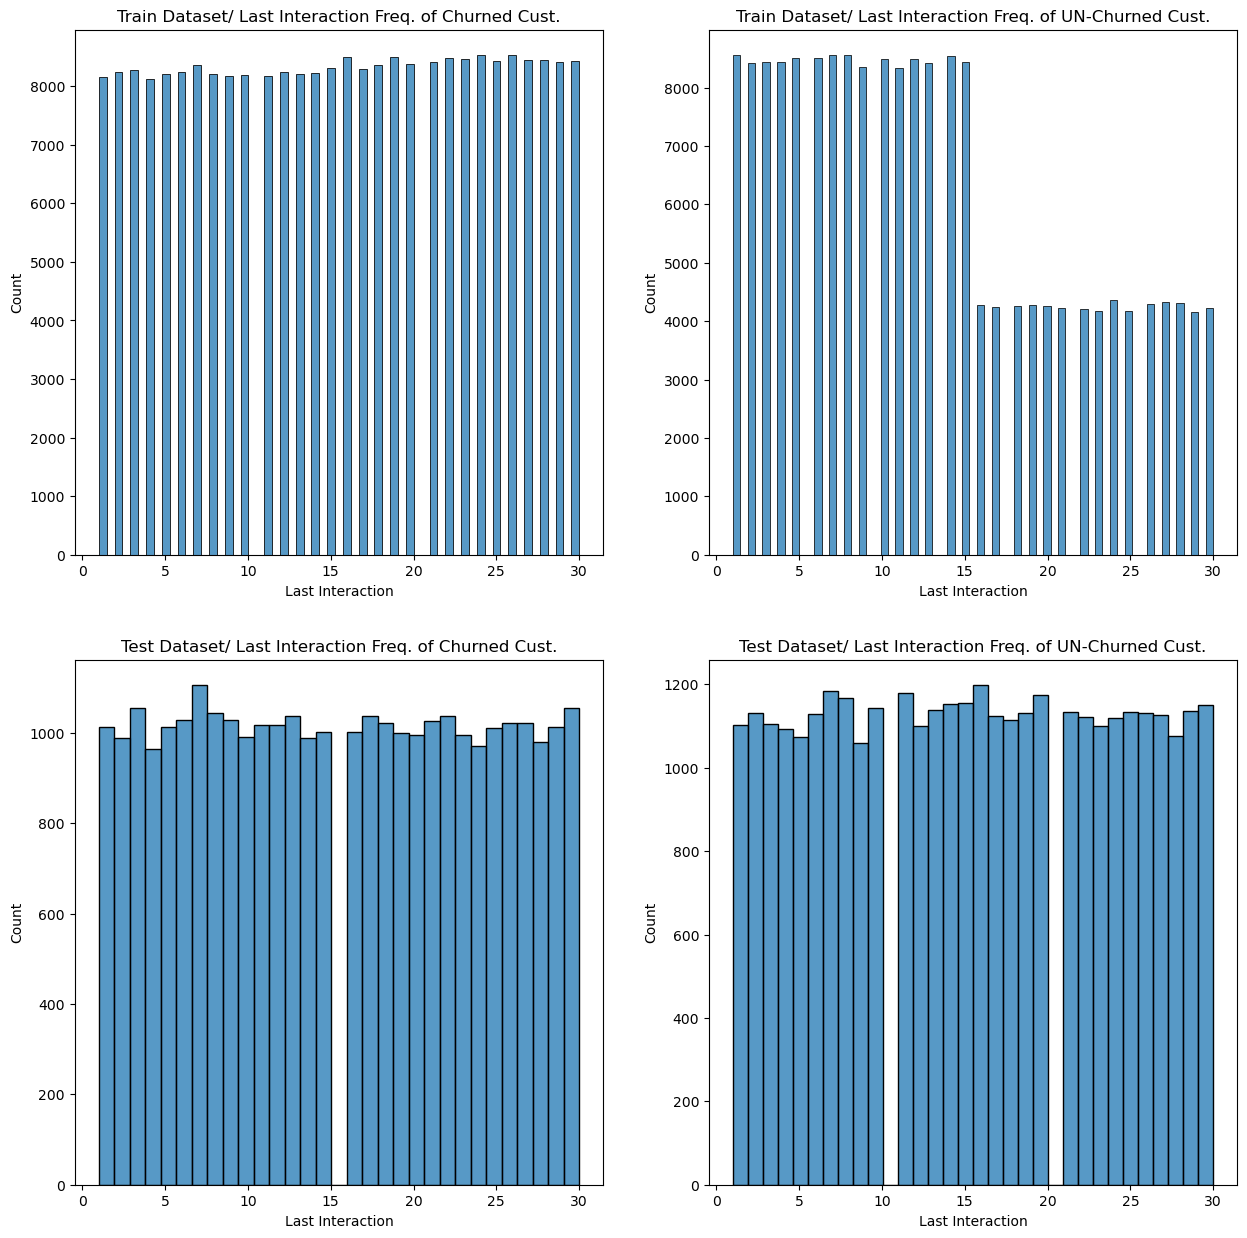

In [41]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.histplot(data=churned_data_train, x='Last Interaction')
plt.title('Train Dataset/ Last Interaction Freq. of Churned Cust.')

plt.subplot(2,2,2)
sns.histplot(data=unchurned_data_train, x='Last Interaction')
plt.title('Train Dataset/ Last Interaction Freq. of UN-Churned Cust.')

plt.subplot(2,2,3)
sns.histplot(data=churned_data_test, x='Last Interaction')
plt.title('Test Dataset/ Last Interaction Freq. of Churned Cust.')

plt.subplot(2,2,4)
sns.histplot(data=unchurned_data_test, x='Last Interaction')
plt.title('Test Dataset/ Last Interaction Freq. of UN-Churned Cust.')

---